In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()      ## object datatype is not suitable for the model so convert it into datatime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['Month'] = pd.to_datetime(df['Month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
## Index(default values) column has to be date column 

df.index = df['Month']
df.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [6]:
## Apart from index column we have month column also. So delete it

del df['Month']
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


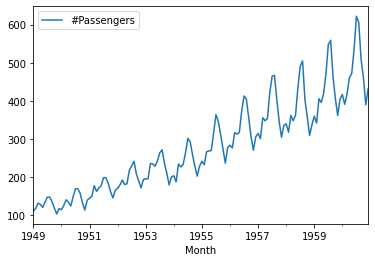

In [7]:
df.plot()
plt.show()

In [8]:
rolling_mean = df.rolling(window = 12).mean()

rolling_mean_detrended = df - rolling_mean

<AxesSubplot:title={'center':'Original values'}, xlabel='Month'>

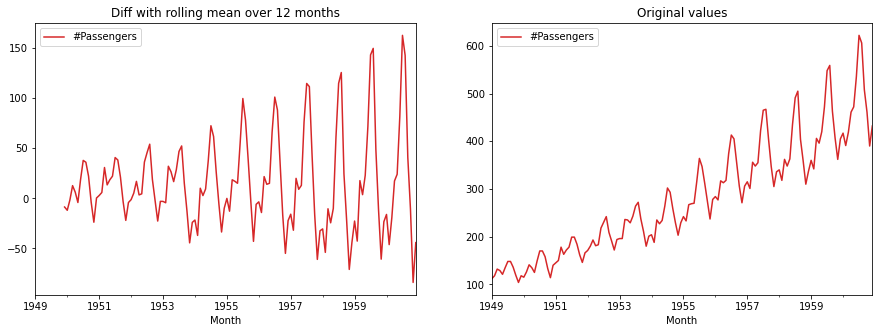

In [9]:
ax1 = plt.subplot(1,2,1)
rolling_mean_detrended.plot(figsize = (15,5) , color = 'tab:red' , ax = ax1 , 
                           title = 'Diff with rolling mean over 12 months')

ax2 = plt.subplot(122)
df.plot(figsize = (15,5) , color = 'tab:red' , ax = ax2 , 
                           title = 'Original values')

## here we are converting non-stationary graph to stationary
## in first graph the mean is constant

<AxesSubplot:title={'center':'Diff with rolling mean over 12 months'}, xlabel='Month'>

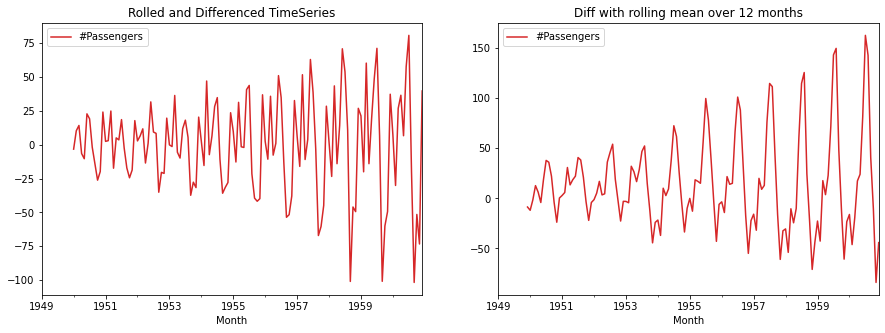

In [10]:
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(1,2,1)
rolling_mean_detrended_diff.plot(figsize = (15,5) , color = 'tab:red' , ax = ax1 , 
                           title = 'Rolled and Differenced TimeSeries')    ## removing seasonality

ax2 = plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize = (15,5) , color = 'tab:red' , ax = ax2 , 
                           title = 'Diff with rolling mean over 12 months')

## In first graph the mean is much more constant 

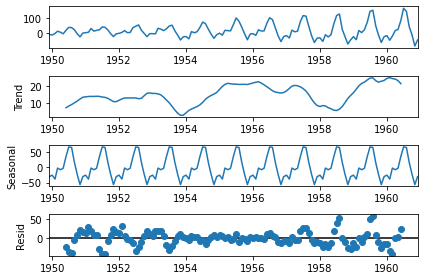

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(rolling_mean_detrended.dropna())
decompose_result.plot();

## this block is for visualization of trend, seasonality, noise in the data seperately

In [12]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

## Manually finding p-value

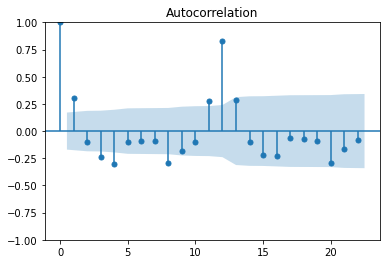

In [13]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(rolling_mean_detrended_diff['#Passengers']);

## Here x-axis shows timelags(t) and y-axis shows correlation
##Points to remember: 1) p != 0
##                    2) the blue shaded region is known as threshold and the values in that region should not be choosen
## Here threshold is increasing 
## select p-value one by one and check the model

## Manually finding q-value

C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


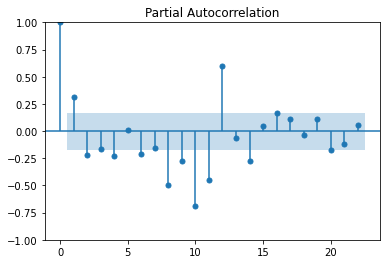

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['#Passengers']);

## here threshold is constant
## the values inside the shaded region should be choosen and q!=0
## select q-value one by one and check the model and so it is time taking process

In [15]:
!pip install pmdarima    
## Pyramid ARIMA

In [16]:
from pmdarima import auto_arima

order = auto_arima(rolling_mean_detrended_diff['#Passengers'] , trace = True)
order.summary()

## this function gives a set of values and at the end gives the best value

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1314.475, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1303.387, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1298.888, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1312.483, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1295.760, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1297.960, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1298.290, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1293.760, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1296.888, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1301.389, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(3, 0, 3)   Log Likelihood                -610.892
Date:                Tue, 28 Mar 2023   AIC                           1235.785
Time:                        15:54:09   BIC                           1255.964
Sample:                    01-01-1950   HQIC                          1243.985
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8644      0.162      5.347      0.000       0.548       1.181
ar.L2          0.2042      0.230      0.889      0.374      -0.246       0.654
ar.L3         -0.5267      0.140     -3.773      0.000      -0.800      -0.253
ma.L1         -0.9137      0.128     -7.155      0.000      -1.164      -0.663
ma.L2         -0.8209      0.168     -4.885      0.000      -1.150      -0.492
ma.L3          0.7469      0.095      7.852      0.000       0.560       0.933
sigma2       586.1983     67.806      8.645      0.000     453.301     719.095
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.72   Prob(JB):                         0.28
Heteroskedasticity (H):               6.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA

In [21]:
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA          

In [22]:
train = rolling_mean_detrended_diff.iloc[:120]['#Passengers']
test = rolling_mean_detrended_diff.iloc[121:]['#Passengers']

model = ARIMA(train , order=(3,0,3))
model_fit = model.fit()
model_fit.summary()

C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertib

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -546.713
Date:                Tue, 28 Mar 2023   AIC                           1109.427
Time:                        16:15:38   BIC                           1131.727
Sample:                    01-01-1950   HQIC                          1118.483
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0651      0.040      1.628      0.103      -0.013       0.143
ar.L1          0.7921      0.116      6.838      0.000       0.565       1.019
ar.L2          0.3299      0.133      2.481      0.013       0.069       0.591
ar.L3         -0.5813      0.077     -7.571      0.000      -0.732      -0.431
ma.L1         -0.8687      2.558     -0.340      0.734      -5.883       4.145
ma.L2         -0.9992      2.296     -0.435      0.663      -5.499       3.501
ma.L3          0.8680      2.718      0.319      0.749      -4.460       6.196
sigma2       484.2934   1586.462      0.305      0.760   -2625.115    3593.702
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.98   Prob(JB):                         0.92
Heteroskedasticity (H):               5.91   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

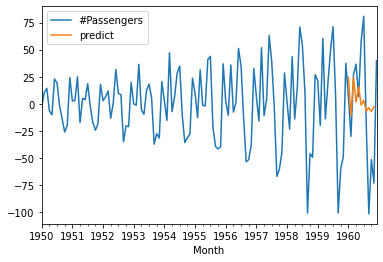

In [23]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start = len(train),
                                                          end = len(train)+len(test)-1,
                                                          dynamic = True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

## here the prediction is not good so we cannot go for forecast

## SARIMAX

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults

model = SARIMAX(train , order=(1,0,2) , seasonal_order=(1,0,2,12) , enforce_stationary = False)
model_fit = model.fit()
model_fit.summary()

C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sravanthi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  120
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -457.892
Date:                            Tue, 28 Mar 2023   AIC                            929.784
Time:                                    16:19:28   BIC                            949.297
Sample:                                01-01-1950   HQIC                           937.708
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7699      0.097      7.944      0.000       0.580       0.960
ma.L1         -1.0693      0.183     -5.857      0.000      -1.427      -0.711
ma.L2          0.0701      0.123      0.570      0.568      -0.171       0.311
ar.S.L12       0.9619      0.031     30.950      0.000       0.901       1.023
ma.S.L12      -0.0866      0.114     -0.761      0.447      -0.309       0.136
ma.S.L24       0.0993      0.124      0.801      0.423      -0.144       0.342
sigma2        94.1162     15.790      5.961      0.000      63.169     125.064
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.85   Prob(JB):                         0.89
Heteroskedasticity (H):               1.98   Skew:                             0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

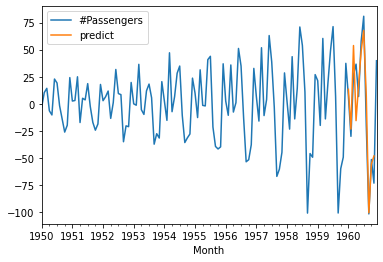

In [26]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start = len(train),
                                                          end = len(train)+len(test)-1,
                                                          dynamic = True)
rolling_mean_detrended_diff[['#Passengers','predict']].plot()

## here the prediction is good so we can go for forecast

<AxesSubplot:xlabel='Month'>

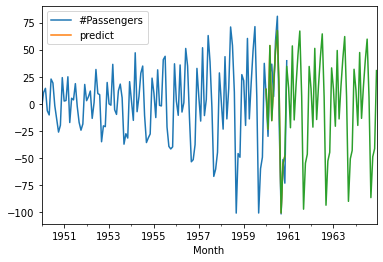

In [30]:
forecast = model_fit.forecast(steps=60)  ## steps = 60 means the data is forecasted for 60 months
rolling_mean_detrended_diff.plot()
forecast.plot()